In [1]:
import pandas as pd
import numpy as np
from glob import glob
from tqdm import tqdm
import warnings

RANDOM_STATE = 42
np.seed = 42
DATA_PATH = "../data_0116/"

warnings.filterwarnings(action='ignore')
PATH_2017 = DATA_PATH + "train/KNOW_2017.csv"
PATH_2018 = DATA_PATH + "train/KNOW_2018.csv"
PATH_2019 = DATA_PATH + "train/KNOW_2019.csv"
PATH_2020 = DATA_PATH + "train/KNOW_2020.csv"

paths = [PATH_2017, PATH_2018, PATH_2019, PATH_2020]

know_train = [pd.read_csv(path) for path in paths]

years = '2017 2018 2019 2020'.split()

In [2]:
know_train[0]

,idx,aq1_1,aq1_2,aq2_1,aq2_2,aq3_1,aq3_2,aq4_1,aq4_2,aq5_1,...,text_response,sim_job,bef_job,able_job,major,description,bq6_mark,bq12_2_mark,bq12_3_mark,bq12_4_mark
0,0,3,3,3,3,3,3,4,4,3,...,자동차도장기능사 실무교육 생산 설비 자동화 없다,없다,없다,건설현장 노무직,실업,도장원(도장기조작원),0,0,0,0
1,1,4,5,4,5,3,4,3,4,3,...,건축전기설비기술사 건설 수주 드라이버 가위,없다,0,0,건축공학,건축설비 기술자,0,0,0,0
2,2,3,4,3,4,3,4,5,6,4,...,건축전기설비기술사 신축 건설 경기 건축 설계 오토캐드 파이프 보일러,없다,0,0,건축공학,건축설비 기술자,0,0,0,0
3,3,3,3,3,3,3,5,4,5,4,...,지적기사 측량 정보통신기술 교육 무량 감소 자동화 토탈 스테이션,지적기사,무,지적공무원,환경학과,지적 및 측량기술자,0,0,0,0
4,4,4,5,3,4,3,4,4,5,3,...,건축전기설비기술사 부동산 거품 건축 경기도 덩달아 불황 캐드 엑셀 건축 도면,없다,0,0,건축공학,건축설비 기술자,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9481,9481,3,5,2,4,3,3,2,2,2,...,편집기술에 원리와 이해능력 출판 업무 특성 기획 업무 한글 편집 프로그램 포토샵 일...,없다,없다,마케팅업무,산업디자인,출판물기획자,1,0,0,0
9482,9482,5,5,5,5,5,5,3,4,4,...,도면 작성 교육 전자 기초 이해 항공우주 분야 국가 경쟁력 위해 육성 전문 특수 정...,없다,없다,없다,우주항공공학,항공공학기술자,0,0,0,0
9483,9483,3,3,4,6,3,3,4,5,4,...,건설 경기 볼트 리벳 없다,건설 노가대,없다,없다,기계,철골공(강구조물 건립원),0,0,0,0
9484,9484,3,5,3,5,4,5,3,4,3,...,공무원 인원 크게 변동 컴퓨터,없다,없다,모름,문헌정보학,법원공무원,0,0,0,0


In [3]:
word_dict_year = {}
for i in range(4):
    word_dict = {}

    for sentence in know_train[i]['text_response']:
        words = sentence.split()
        for word in words:
            if word in word_dict.keys():
                word_dict[word] += 1
            else:
                word_dict[word] = 1

    word_dict_year[i] = word_dict

In [4]:
for i in range(4):
    word_dict = word_dict_year[i]
    print(sorted(word_dict.items(), key=lambda x:x[1], reverse=True)[:20])

[('없다', 7901), ('컴퓨터', 1741), ('증가', 1526), ('프로그램', 1324), ('감소', 921), ('때문', 713), ('수요', 665), ('대한', 654), ('엑셀', 643), ('자동화', 642), ('변화', 550), ('시스템', 531), ('교육', 492), ('도구', 470), ('사람', 456), ('기계', 438), ('산업', 423), ('자격증', 404), ('유지', 403), ('관련', 400)]
[('없음', 2701), ('컴퓨터', 1432), ('증가', 1106), ('감소', 881), ('자동화', 718), ('변화', 693), ('엑셀', 650), ('때문', 536), ('프로그램', 534), ('사람', 492), ('교육', 483), ('없다', 445), ('수요', 442), ('대한', 416), ('인구', 397), ('일자리', 373), ('자격증', 369), ('관련', 326), ('업무', 321), ('PC', 316)]
[('증가', 1308), ('교육', 1073), ('도입', 989), ('업무', 975), ('감소', 893), ('변화', 765), ('장비', 733), ('자동화', 707), ('기술', 696), ('기계', 629), ('공란', 608), ('프로그램', 605), ('대한', 529), ('개발', 485), ('대체', 454), ('시스템', 447), ('사람', 441), ('때문', 438), ('일자리', 427), ('관련', 400)]
[('증가', 1259), ('감소', 980), ('변화', 811), ('자동화', 667), ('일자리', 601), ('업무', 556), ('교육', 538), ('기술', 535), ('도입', 534), ('수요', 479), ('시스템', 475), ('기계', 468), ('유지', 447), ('자격증', 408), ('사

In [5]:
for i in range(4):
    print(len(word_dict_year[i]))

12590
15650
11393
6886


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc  
rc('font', family='NanumGothic') 			
plt.rcParams['axes.unicode_minus'] = False 

In [7]:
for i in range(4):
    word_dict = word_dict_year[i]
    print(sorted(word_dict.items(), key=lambda x:x[1])[:20])

[('지적기사', 1), ('정보통신기술', 1), ('거품', 1), ('경기도', 1), ('덩달아', 1), ('자유로운', 1), ('근무조건', 1), ('퍼티', 1), ('페이스', 1), ('항공교통관제관련교육', 1), ('위험관리사', 1), ('위험물취급메뉴얼숙지', 1), ('국경', 1), ('작성요령', 1), ('산업안전산업기사이상', 1), ('작업상', 1), ('지식공부', 1), ('GA', 1), ('Analyeics', 1), ('자료조사', 1)]
[('세라믹', 1), ('지르크니아', 1), ('치카공', 1), ('독학', 1), ('서브라임텍스트', 1), ('틀니', 1), ('인플란트등', 1), ('니켈', 1), ('크롬', 1), ('코발트', 1), ('engine', 1), ('진료준비', 1), ('진료스킬', 1), ('제작이론', 1), ('활용을', 1), ('분업', 1), ('단백질', 1), ('펩타이드', 1), ('proteome', 1), ('discoverer_바이오이미징분석', 1)]
[('전동차정비원', 1), ('전동차', 1), ('특수장비면허증', 1), ('기상캐스터', 1), ('전기철도차량정비기사', 1), ('희망이', 1), ('CG제작', 1), ('버거', 1), ('그거', 1), ('분담', 1), ('패스트푸드', 1), ('사량', 1), ('CATIA', 1), ('메커니즘', 1), ('문제확인', 1), ('단점', 1), ('꼼꼼함과', 1), ('투여', 1), ('불가분', 1), ('위험물관련기사', 1)]
[('기초보건교육', 1), ('가의', 1), ('처방', 1), ('헤어미용사자격증', 1), ('손님응대', 1), ('전문학교', 1), ('에어컨', 1), ('아이들을', 1), ('사랑하는', 1), ('도시계획서', 1), ('수소차', 1), ('공조냉동기계', 1), ('에너지산업관리기사', 1), ('불가분', 1), 

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


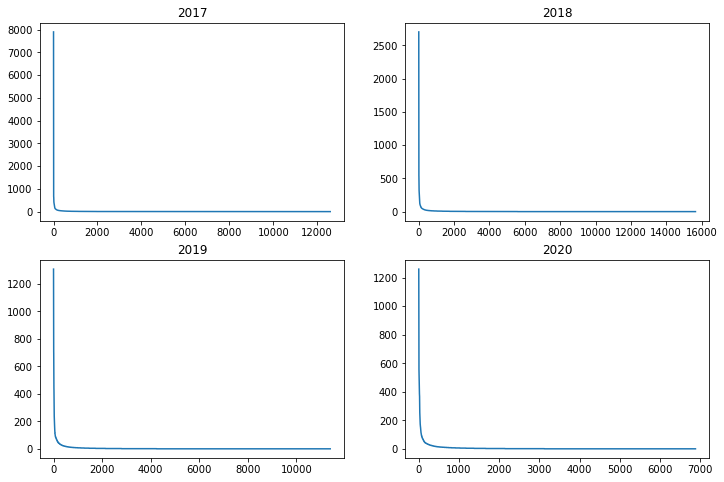

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, year in enumerate(years):
    if year == '2017': r,c = 0,0
    elif year == '2018': r,c = 0,1
    elif year == '2019': r,c = 1,0
    elif year == '2020': r,c = 1,1

    word_dict = word_dict_year[i]
    axes[r,c].plot(sorted(word_dict.values(), reverse=True))
    axes[r,c].set_title(year)
fig.show()

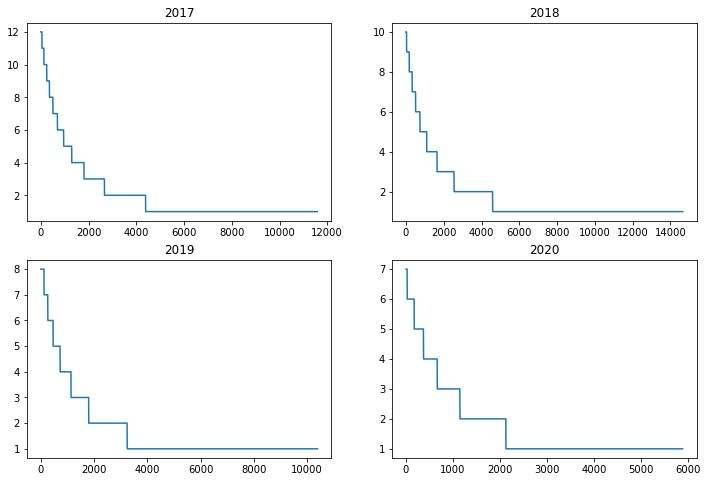

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, year in enumerate(years):
    if year == '2017': r,c = 0,0
    elif year == '2018': r,c = 0,1
    elif year == '2019': r,c = 1,0
    elif year == '2020': r,c = 1,1

    word_dict = word_dict_year[i]
    axes[r,c].plot(sorted(word_dict.values(), reverse=True)[1000:])
    axes[r,c].set_title(year)
fig.show()

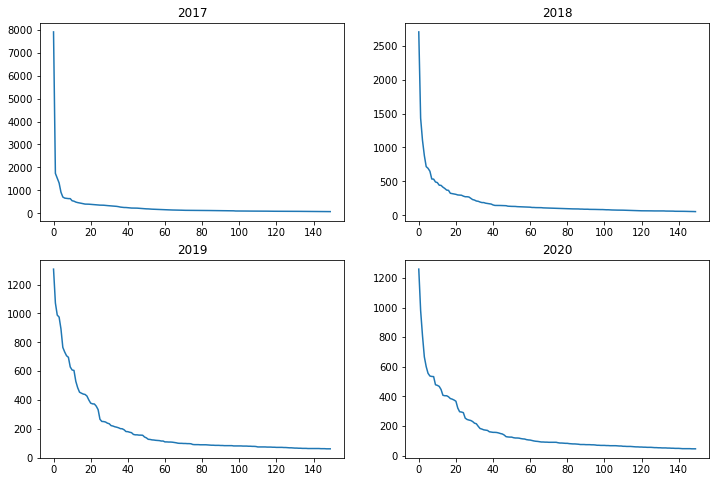

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, year in enumerate(years):
    if year == '2017': r,c = 0,0
    elif year == '2018': r,c = 0,1
    elif year == '2019': r,c = 1,0
    elif year == '2020': r,c = 1,1

    word_dict = word_dict_year[i]
    axes[r,c].plot(sorted(word_dict.values(), reverse=True)[:150])
    axes[r,c].set_title(year)
fig.show()

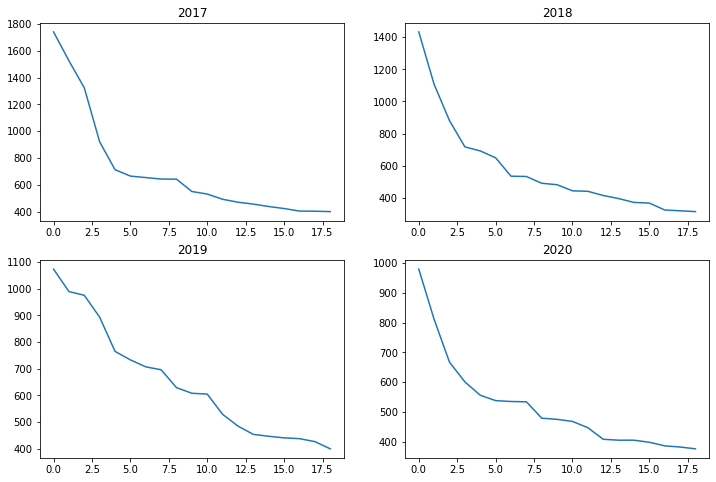

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, year in enumerate(years):
    if year == '2017': r,c = 0,0
    elif year == '2018': r,c = 0,1
    elif year == '2019': r,c = 1,0
    elif year == '2020': r,c = 1,1

    word_dict = word_dict_year[i]
    axes[r,c].plot(sorted(word_dict.values(), reverse=True)[1:20])
    axes[r,c].set_title(year)
fig.show()

# Preprocessing Idea

* `text_response` column을 \[`keyword`, `없음_count` \]로 분리

In [12]:
from collections import Counter

## find stop words manually

In [13]:
stop_words = set()

In [14]:
# 2017
print(sorted(word_dict_year[0].items(), key=lambda x:x[1], reverse=True)[:150])

[('없다', 7901), ('컴퓨터', 1741), ('증가', 1526), ('프로그램', 1324), ('감소', 921), ('때문', 713), ('수요', 665), ('대한', 654), ('엑셀', 643), ('자동화', 642), ('변화', 550), ('시스템', 531), ('교육', 492), ('도구', 470), ('사람', 456), ('기계', 438), ('산업', 423), ('자격증', 404), ('유지', 403), ('관련', 400), ('업무', 394), ('경기', 388), ('일자리', 384), ('관심', 377), ('장비', 366), ('계속', 359), ('인구', 358), ('발달', 355), ('없음', 345), ('인력', 339), ('발전', 332), ('기술', 329), ('포토샵', 322), ('전산', 310), ('관리', 305), ('훈련', 292), ('공구', 274), ('필요', 266), ('직업', 256), ('침체', 255), ('장갑', 246), ('분석', 235), ('대체', 232), ('분야', 231), ('개발', 229), ('캐드', 228), ('학생', 221), ('건설', 213), ('가위', 210), ('안전교육', 199), ('한글', 197), ('시장', 195), ('환경', 188), ('워드', 183), ('추세', 180), ('드라이버', 179), ('안전', 174), ('파워포인트', 173), ('기계화', 168), ('노트북', 165), ('사회', 164), ('인터넷', 162), ('직무교육', 153), ('확대', 148), ('일러스트', 147), ('생산', 146), ('작업', 146), ('기기', 145), ('상태', 142), ('기구', 138), ('업종', 134), ('마이크', 133), ('방송', 132), ('수가', 132), ('현상', 131

In [15]:
stop_words.update(
    set('''
없다 증가 없음 감소 때문 수요 대한 모름 도구 사람 산업 관련 유지 업무 일자리 관심
계속 인력 발달 발전 필요 직업 분야 대체 환경 추세 사회 확대 상태 이용 것이므 사용
'''.split())
)

In [16]:
# 2018
print(sorted(word_dict_year[1].items(), key=lambda x:x[1], reverse=True)[:150])

[('없음', 2701), ('컴퓨터', 1432), ('증가', 1106), ('감소', 881), ('자동화', 718), ('변화', 693), ('엑셀', 650), ('때문', 536), ('프로그램', 534), ('사람', 492), ('교육', 483), ('없다', 445), ('수요', 442), ('대한', 416), ('인구', 397), ('일자리', 373), ('자격증', 369), ('관련', 326), ('업무', 321), ('PC', 316), ('산업', 310), ('경기', 301), ('인력', 299), ('기계', 297), ('발전', 284), ('시스템', 275), ('기술', 275), ('발달', 271), ('포토샵', 252), ('계속', 233), ('한글', 226), ('파워포인트', 212), ('의사면허증', 208), ('직업', 197), ('훈련', 189), ('유지', 189), ('개발', 180), ('관심', 176), ('침체', 172), ('분야', 167), ('워드', 154), ('캐드', 147), ('필요', 147), ('예상', 146), ('안전교육', 146), ('기계화', 145), ('시장', 144), ('대체', 143), ('건설', 136), ('환경', 134), ('실무교육', 133), ('인터넷', 133), ('사회', 132), ('가위', 129), ('전문의', 128), ('드라이버', 128), ('노트북', 127), ('업체', 125), ('전산', 125), ('마이크', 124), ('CAD', 121), ('추세', 117), ('사업', 117), ('현재', 115), ('이해', 115), ('현상', 115), ('학생', 114), ('인원', 111), ('ERP', 110), ('인공', 109), ('지능', 107), ('생각', 106), ('모름', 105), ('공구', 105), ('확대', 

In [17]:
stop_words.update(
    set('''
없음 증가 감소 때문 사람 없다 대한 일자리 관련 업무 필요 예상 생각 모름 점점
갈수록 이기 크게 시대작업 능력 습득 부분
'''.split())
)

In [18]:
# 2019
print(sorted(word_dict_year[2].items(), key=lambda x:x[1], reverse=True)[:150])

[('증가', 1308), ('교육', 1073), ('도입', 989), ('업무', 975), ('감소', 893), ('변화', 765), ('장비', 733), ('자동화', 707), ('기술', 696), ('기계', 629), ('공란', 608), ('프로그램', 605), ('대한', 529), ('개발', 485), ('대체', 454), ('시스템', 447), ('사람', 441), ('때문', 438), ('일자리', 427), ('관련', 400), ('인력', 378), ('수요', 373), ('인구', 372), ('자격증', 357), ('발달', 333), ('필요', 266), ('산업', 251), ('컴퓨터', 250), ('경기', 247), ('사용', 239), ('발전', 235), ('안전교육', 222), ('전산', 219), ('관리', 214), ('계속', 211), ('분석', 207), ('서비스', 201), ('인원', 200), ('환경', 193), ('인공', 181), ('지능', 180), ('직업', 176), ('생각', 173), ('예상', 161), ('침체', 158), ('기계화', 158), ('훈련', 156), ('관심', 156), ('인터넷', 155), ('작업', 143), ('신규', 137), ('제품', 127), ('생산', 126), ('분야', 123), ('활용', 122), ('안전', 120), ('설비', 119), ('부분', 118), ('시장', 115), ('방법', 115), ('전기기사', 109), ('정보처리기사', 109), ('사업', 108), ('현재', 108), ('변경', 107), ('연구', 105), ('건설', 103), ('스트레스', 100), ('온라인', 99), ('유지', 99), ('추세', 98), ('기능사', 98), ('향상', 97), ('학생', 97), ('실무', 96), ('부족', 

In [19]:
stop_words.update(
    set('''
증가 도입 공란 대한 대체 때문 일자리 관련 필요 사용 발전 직업 생각 예상
분야 활용 부분 변경 상품 이용 이해 추가 증대 추세 실무 점점 진행 사회
업종 숙지 기존 위해 경우 대신 과정 조직 발생 이기 갈수록 일이 근무
'''.split())
)

In [20]:
# 2020
print(sorted(word_dict_year[3].items(), key=lambda x:x[1], reverse=True)[:150])

[('증가', 1259), ('감소', 980), ('변화', 811), ('자동화', 667), ('일자리', 601), ('업무', 556), ('교육', 538), ('기술', 535), ('도입', 534), ('수요', 479), ('시스템', 475), ('기계', 468), ('유지', 447), ('자격증', 408), ('사람', 405), ('개발', 405), ('대체', 398), ('발달', 386), ('장비', 382), ('경기', 376), ('인력', 368), ('때문', 322), ('인구', 297), ('산업', 295), ('대한', 291), ('상태', 254), ('침체', 245), ('프로그램', 241), ('관심', 238), ('발전', 231), ('전산', 220), ('계속', 216), ('훈련', 199), ('관련', 184), ('환경', 180), ('코로나', 175), ('컴퓨터', 173), ('직업', 171), ('지능', 162), ('예상', 160), ('인공', 158), ('상황', 158), ('분야', 157), ('필요', 154), ('건설', 150), ('변동', 147), ('관리', 140), ('인터넷', 129), ('직무교육', 127), ('산업기사', 126), ('기계화', 126), ('영향', 122), ('인원', 120), ('작업', 120), ('사회', 119), ('사용', 116), ('서비스', 114), ('불가', 113), ('시장', 109), ('현재', 107), ('온라인', 106), ('불황', 103), ('설비', 100), ('기업', 98), ('생각', 97), ('지금', 95), ('이용', 93), ('로봇', 93), ('사업', 92), ('화로', 92), ('실무', 91), ('생산', 91), ('확대', 91), ('의사', 91), ('직종', 91), ('추세', 88), ('문화', 

In [21]:
stop_words.update(
    set('''
업무 때문 대한 상태 관심 계속 관련 예상 상황 분야 필요 현재 지금 선호 점점 고용 한정 대신
시대 크게 부분 다양 중요성 문제
'''.split())
)

In [22]:
print(stop_words)

{'직업', '과정', '크게', '산업', '발전', '이용', '다양', '일자리', '상품', '없음', '선호', '모름', '추가', '경우', '것이므', '사람', '관련', '감소', '증대', '고용', '현재', '관심', '대한', '이해', '문제', '일이', '계속', '예상', '점점', '도입', '조직', '인력', '습득', '근무', '필요', '진행', '공란', '지금', '분야', '실무', '변경', '부분', '수요', '발생', '능력', '확대', '시대작업', '갈수록', '활용', '유지', '업무', '사회', '중요성', '업종', '이기', '없다', '대신', '숙지', '한정', '환경', '때문', '시대', '대체', '증가', '위해', '상태', '도구', '사용', '발달', '기존', '생각', '추세', '상황'}


In [23]:
for i, year in enumerate(years):
    print(year)
    selection_size = 200
    word_dict = word_dict_year[i]
    selected_words = [x[0] for x in sorted(word_dict.items(), reverse=True, key=lambda x:x[1])[:selection_size]]
    selected_words = list(set(selected_words) - stop_words)

    print("Words not selected:", len(stop_words))
    print("Words selected: ", len(selected_words))
    print(f"df size after preprocessing: ({know_train[i].shape[0]} x {know_train[i].shape[1] + len(selected_words)})")

2017
Words not selected: 73
Words selected:  151
df size after preprocessing: (9486 x 306)
2018
Words not selected: 73
Words selected:  148
df size after preprocessing: (9072 x 278)
2019
Words not selected: 73
Words selected:  139
df size after preprocessing: (8555 x 291)
2020
Words not selected: 73
Words selected:  143
df size after preprocessing: (8122 x 328)


In [24]:
for i in range(4):
    print(years[i])
    data_path = f'../data_0120/train/KNOW_{2017+i}.csv'
    word_dict = word_dict_year[i]
    selected_words = [x[0] for x in sorted(word_dict.items(), reverse=True, key=lambda x:x[1])[:selection_size]]
    selected_words = list(set(selected_words) - stop_words)
    
    text_col_dict = {}
    for word in selected_words:
        text_col_dict[word] = []

    for text in know_train[i]['text_response']: # O(rows)
        words = text.split()
        for selected_word in selected_words: # O(n) n = 150
            if selected_word in words:
                text_col_dict[selected_word].append(1)
            else:
                text_col_dict[selected_word].append(0)

    text_df = pd.DataFrame(text_col_dict)
    text_df['idx'] = know_train[i]['idx']

    df = pd.merge(know_train[i], text_df, 
        left_on='idx', right_on='idx'
    )
    ubda_cnt_dict = []

    for text in know_train[i]['text_response']: # O(rows) rows = 9486
        words = text.split()
        counter = Counter(words)
        ubda_cnt_dict.append(counter['없다'] + counter['없음'] + counter['모름'] + counter['공란'])

    df['ubda_cnt'] = pd.Series(ubda_cnt_dict)
    
    new_cols = df.columns.tolist()
    new_cols.remove('text_response')
    new_cols.remove('knowcode')

    df[new_cols + ['knowcode']].to_csv(data_path, index=False)

2017
2018
2019
2020


In [25]:
PATH_2017 = DATA_PATH + "test/KNOW_2017_test.csv"
PATH_2018 = DATA_PATH + "test/KNOW_2018_test.csv"
PATH_2019 = DATA_PATH + "test/KNOW_2019_test.csv"
PATH_2020 = DATA_PATH + "test/KNOW_2020_test.csv"

paths = [PATH_2017, PATH_2018, PATH_2019, PATH_2020]

know_test = [pd.read_csv(path) for path in paths]

In [26]:
for i in range(4):
    print(years[i])
    data_path = f'../data_0120/test/KNOW_{2017+i}_test.csv'
    word_dict = word_dict_year[i]
    selected_words = [x[0] for x in sorted(word_dict.items(), reverse=True, key=lambda x:x[1])[:selection_size]]
    selected_words = list(set(selected_words) - stop_words)
    text_col_dict = {}
    for word in selected_words:
        text_col_dict[word] = []

    for text in know_test[i]['text_response']: # O(rows)
        words = text.split()
        for selected_word in selected_words: # O(n) n = 150
            if selected_word in words:
                text_col_dict[selected_word].append(1)
            else:
                text_col_dict[selected_word].append(0)

    text_df = pd.DataFrame(text_col_dict)
    text_df['idx'] = know_test[i]['idx']

    df = pd.merge(know_test[i], text_df, 
        left_on='idx', right_on='idx'
    )
    ubda_cnt_dict = []

    for text in know_test[0]['text_response']: # O(rows) rows = 9486
        words = text.split()
        counter = Counter(words)
        ubda_cnt_dict.append(counter['없다'] + counter['없음'] + counter['모름'] + counter['공란'])

    df['ubda_cnt'] = pd.Series(ubda_cnt_dict)
    
    new_cols = df.columns.tolist()
    new_cols.remove('text_response')

    df[new_cols].to_csv(data_path, index=False)

2017
2018
2019
2020
